In [86]:
### Project Main Code File
### ICMF 324 - Mahidol University International College
### Logan Harris, Jannis Thiemann, [Everyone Enter Their Name Here]

Source: https://www.kaggle.com/datasets/darrylljk/worlds-best-universities-qs-rankings-2025

QS Documentation: https://support.qs.com/hc/en-gb/articles/4405955370898-QS-World-University-Rankings

# Variables

2025_Rank: QS World University Rankings in 2025.

2024_Rank: QS World University Rankings in 2024.

Institution_Name: Name of the institution.

Location: 2-letter country code (ISO 3166-1 alpha-2).

Location_Full: Full country name.

Size: Student body size category based on FTE; XL (>30,000), L (>=12,000), M (>=5,000), S (<5,000)

Academic_Reputation: Composite score (0-100) from a global academic survey of experts that weighs domestic and international nominations over five years

Employer Reputation: Composite score (0–100) derived from global employer surveys that combine international and domestic weighted counts over five years

Faculty Student: Ratio of full-time equivalent (FTE) academic staff to FTE students, indicating the academic resource availability per student

Citations per Faculty: Average citation count per faculty member, adjusted for paper-type exclusions, self-citations, and faculty area normalization, based on a six-year citation window from Scopus

International Faculty: Proportion of international faculty staff (determined by citizenship) among overall faculty staff

International Students: Proportion of international students (foreign nationals studying for at least three months) among the overall student body

International Research Network: Composite measure of the diversity and strength of sustained international research partnerships, normalized across faculty areas using joint publication data.

Employment Outcomes: Composite measure of an institution's success in producing highly employable graduates and impactful alumni

Sustainability: Composite measure of an institution's commitment to environmental, social, and governance initiatives—including campus projects, diversity, and SDG-focused research

QS Overall Score: Composite score combining the weighted indicators across lenses (Research and Discovery, Employability and Outcomes, Global Engagement, Learning Experience, and Sustainability)

In [90]:
# import libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import pycountry
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# load data
df = pd.read_csv('qs-world-rankings-2025.csv', encoding='UTF-8-SIG')

# Drop the redundant columns and assign to df1
df1 = df.drop(columns=["QS Overall Score", "Location Full", "2025 Rank", "2024 Rank"])

# Create a mapping dictionary for renaming the indicators
rename_dict = {
    "Academic Reputation": "AR",
    "Citations per Faculty": "CPF",
    "Employer Reputation": "ER",
    "Employment Outcomes": "EO",
    "International Faculty": "IFR",
    "International Research Network": "IRN",
    "International Students": "ISR",
    "Faculty Student": "FSR",
    "Sustainability": "SUS",
    "Institution Name": "Name"
}

# Rename the columns in df1
df1 = df1.rename(columns=rename_dict)

# Display the first few rows of df1 to verify the changes
df1.head()

,Name,Location,Size,AR,ER,FSR,CPF,IFR,ISR,IRN,EO,SUS
0,Massachusetts Institute of Technology (MIT),US,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0
1,Imperial College London,UK,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7
2,University of Oxford,UK,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0
3,Harvard University,US,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4
4,University of Cambridge,UK,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8


In [92]:
df1.tail()

,Name,Location,Size,AR,ER,FSR,CPF,IFR,ISR,IRN,EO,SUS
1498,University of Montana Missoula,US,M,3.0,2.2,10.6,6.1,1.3,1.9,6.5,3.1,1.0
1499,University of Oradea,RO,L,5.6,2.2,4.0,1.9,1.5,5.2,34.5,6.2,2.3
1500,University of San Carlos,PH,M,7.2,9.4,3.3,1.8,2.1,2.1,6.4,9.6,1.0
1501,"University Politehnica of Timisoara, UPT",RO,L,4.1,4.2,7.2,3.9,1.4,2.5,18.6,3.9,1.1
1502,Western Washington University,US,L,2.6,2.6,7.3,3.5,9.7,1.6,12.4,1.5,1.1


In [94]:
df1.shape

(1503, 12)

In [96]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1503 non-null   object 
 1   Location  1503 non-null   object 
 2   Size      1503 non-null   object 
 3   AR        1503 non-null   float64
 4   ER        1503 non-null   float64
 5   FSR       1503 non-null   float64
 6   CPF       1503 non-null   float64
 7   IFR       1403 non-null   float64
 8   ISR       1445 non-null   float64
 9   IRN       1502 non-null   float64
 10  EO        1503 non-null   float64
 11  SUS       1484 non-null   float64
dtypes: float64(9), object(3)
memory usage: 141.0+ KB


# Missing Value Analysis

In [99]:
missing_counts = df1.isnull().sum()
print("Missing values per column:\n", missing_counts)

Missing values per column:
 Name          0
Location      0
Size          0
AR            0
ER            0
FSR           0
CPF           0
IFR         100
ISR          58
IRN           1
EO            0
SUS          19
dtype: int64


In [101]:
missing_percent = (df1.isnull().sum() / len(df)) * 100
print("Missing values percentage per column:\n", missing_percent)

Missing values percentage per column:
 Name        0.000000
Location    0.000000
Size        0.000000
AR          0.000000
ER          0.000000
FSR         0.000000
CPF         0.000000
IFR         6.653360
ISR         3.858949
IRN         0.066534
EO          0.000000
SUS         1.264138
dtype: float64


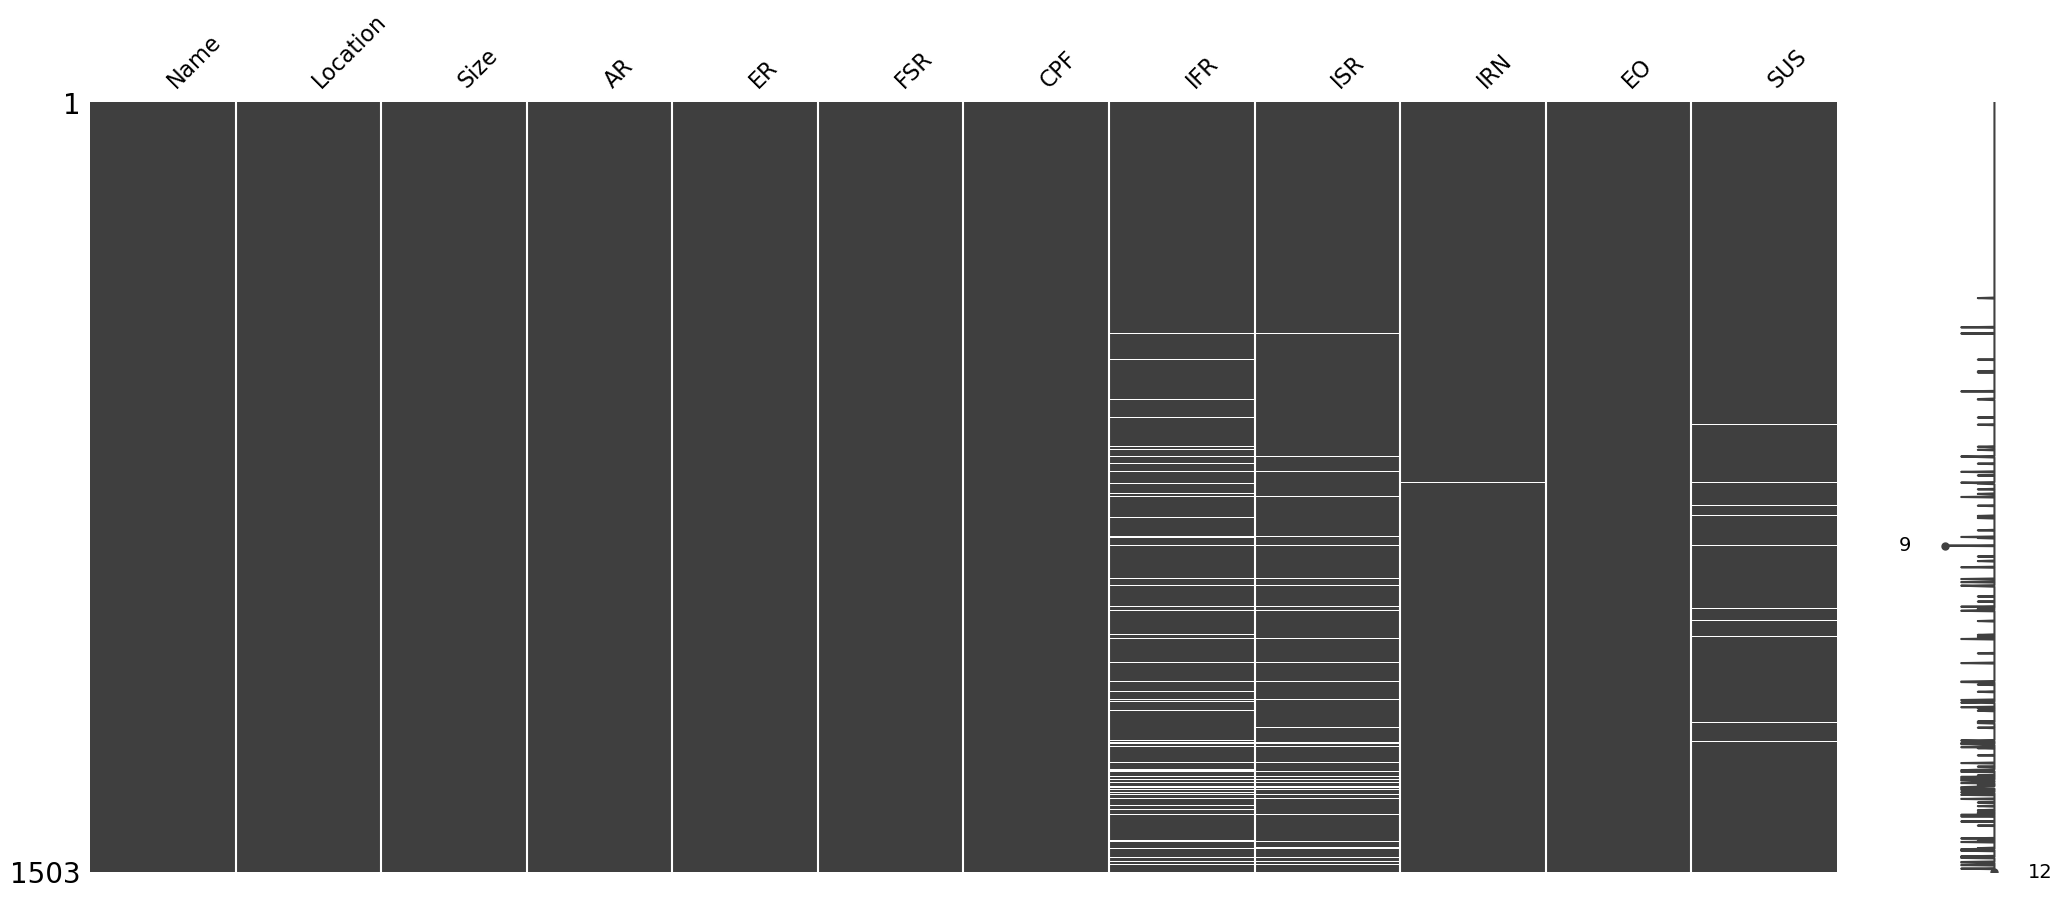

In [103]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize the missing data matrix
msno.matrix(df1)
plt.show()

In [105]:
columns_to_impute = ['IFR', 'ISR', 'IRN', 'SUS']

# Impute with median
df1[columns_to_impute] = df1[columns_to_impute].fillna(df1[columns_to_impute].median())

missing_counts = df1.isnull().sum()
print("Missing values per column:\n", missing_counts)

Missing values per column:
 Name        0
Location    0
Size        0
AR          0
ER          0
FSR         0
CPF         0
IFR         0
ISR         0
IRN         0
EO          0
SUS         0
dtype: int64


In [107]:
df1.describe().round(2)

,AR,ER,FSR,CPF,IFR,ISR,IRN,EO,SUS
count,1503.00,1503.00,1503.00,1503.00,1503.00,1503.00,1503.00,1503.00,1503.00
mean,20.29,19.79,28.13,23.50,29.51,24.96,50.13,23.83,24.09
std,22.33,23.78,27.61,27.87,33.48,30.65,29.86,27.35,30.94
min,1.30,1.10,1.00,1.00,1.00,1.00,1.00,1.20,1.00
25%,6.30,4.30,7.30,2.80,4.60,3.10,22.75,4.00,1.30
50%,11.00,9.40,16.00,9.90,12.50,9.60,51.10,11.80,6.75
75%,23.50,25.30,40.40,36.40,46.55,36.95,77.10,33.40,39.50
max,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00


In [109]:
df1.describe(include='object')

,Name,Location,Size
count,1503,1503,1503
unique,1503,106,4
top,Massachusetts Institute of Technology (MIT),US,L
freq,1,197,691


In [111]:
df1.nunique()

Name        1503
Location     106
Size           4
AR           472
ER           500
FSR          590
CPF          566
IFR          531
ISR          521
IRN          764
EO           569
SUS          396
dtype: int64

In [113]:
df['Location'].value_counts()

Location
US     197
UK      90
CN      71
JP      49
DE      48
      ... 
NCY      1
IS       1
CY       1
LU       1
HN       1
Name: count, Length: 106, dtype: int64

# Visualizations

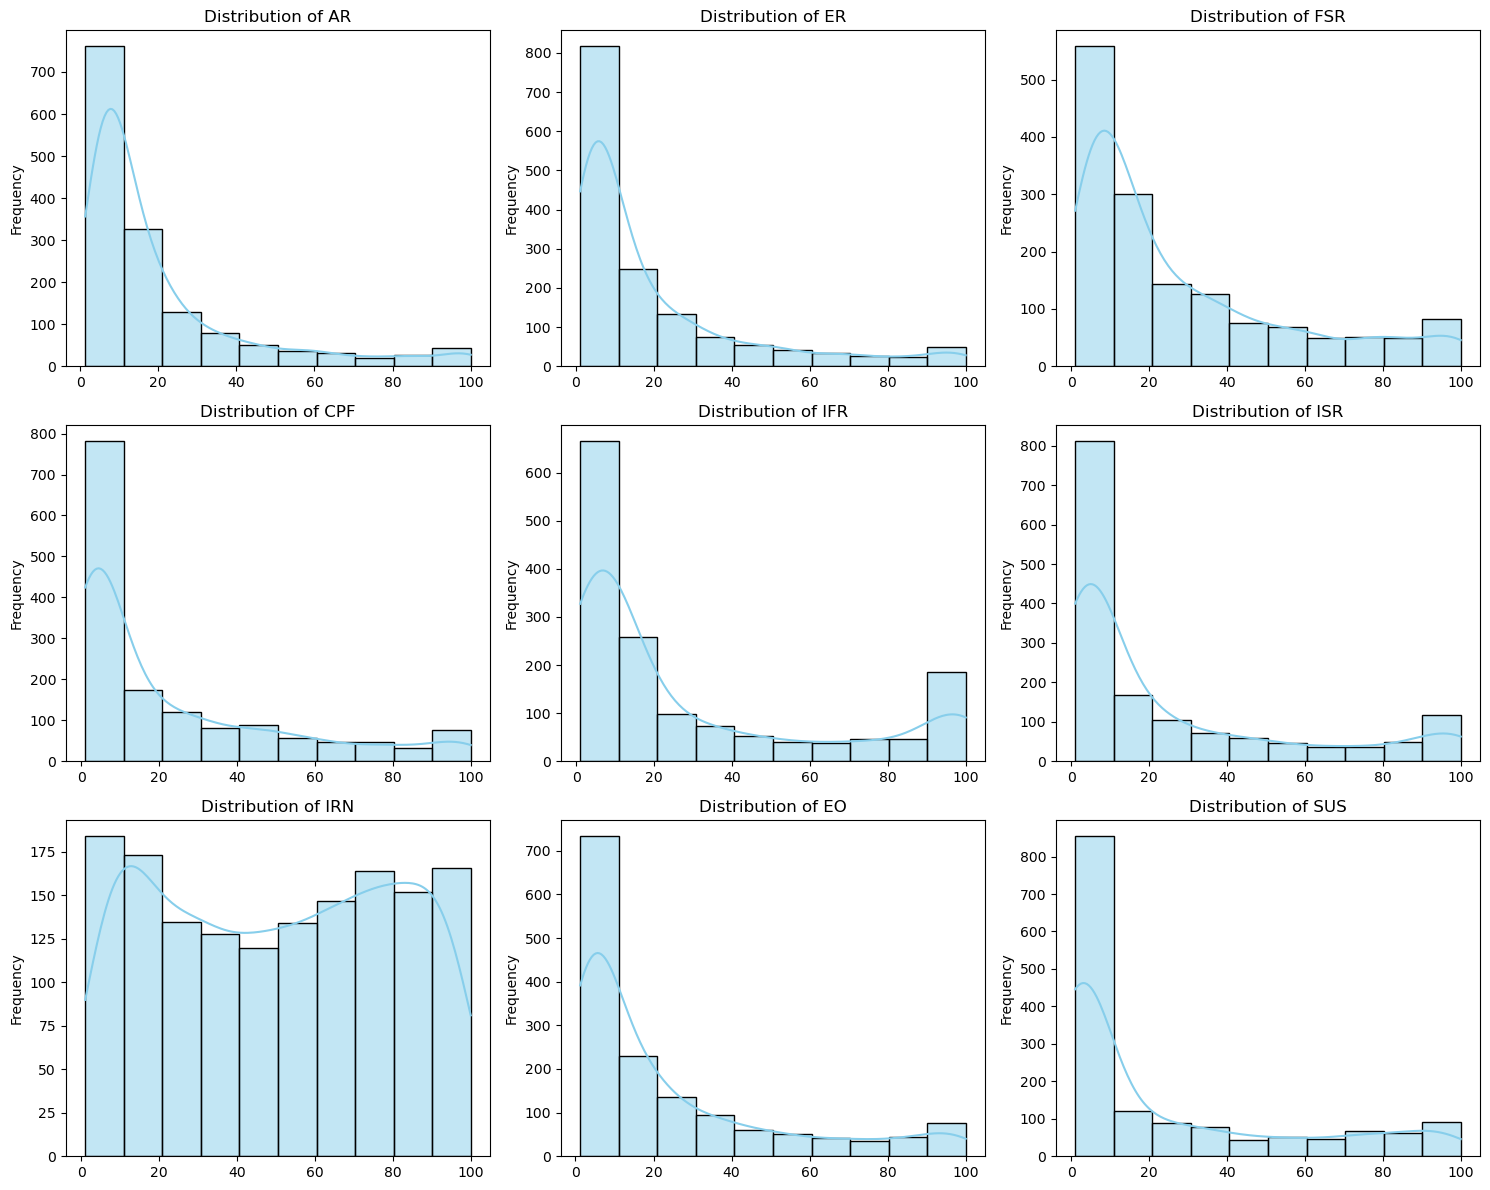

In [116]:
# 3x3 matrix of KDE + histogram plots
columns_to_plot = ['AR', 'ER', 'FSR', 'CPF', 'IFR', 'ISR', 'IRN', 'EO', 'SUS']

# Create the subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()  # Flatten to make indexing easy

# Loop through each variable and plot
for i, col in enumerate(columns_to_plot):
    sns.histplot(df1[col], bins=10, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots (in case fewer than 9 variables)
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

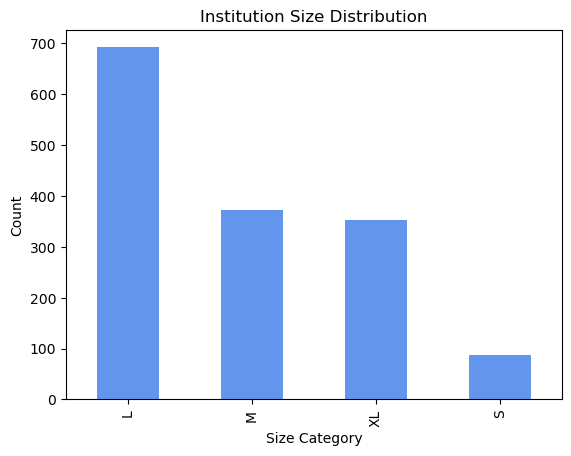

In [117]:
# Institutions by size
df1['Size'].value_counts().plot(kind='bar', color='cornflowerblue')
plt.title('Institution Size Distribution')
plt.xlabel('Size Category')
plt.ylabel('Count')
plt.show()

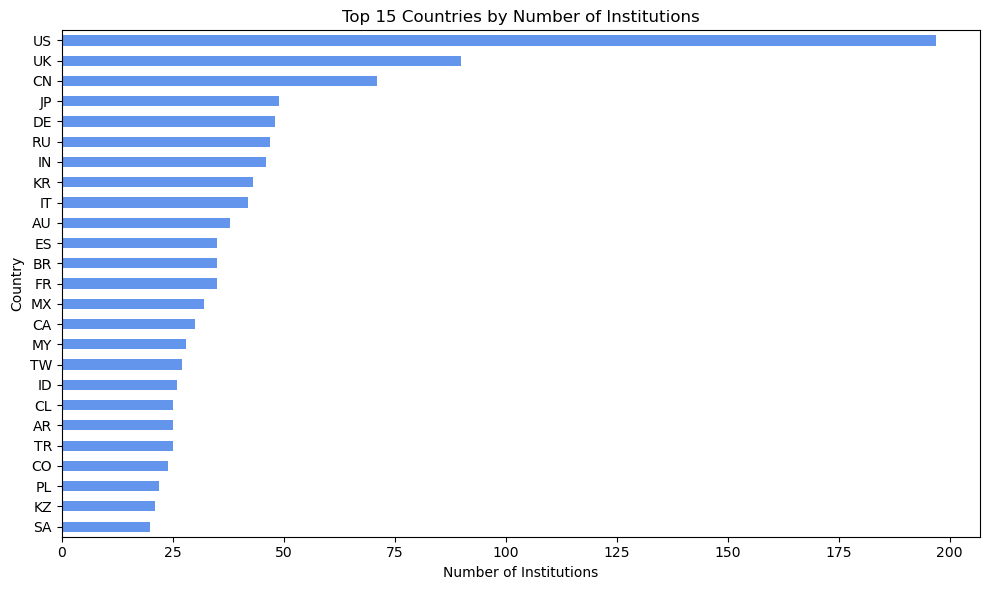

In [120]:
# Count institutions per 2-letter country code
top_countries = df1['Location'].value_counts().head(25)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
top_countries.sort_values().plot(kind='barh', color='cornflowerblue')

plt.xlabel('Number of Institutions')
plt.ylabel('Country')
plt.title('Top 15 Countries by Number of Institutions')
plt.tight_layout()
plt.show()

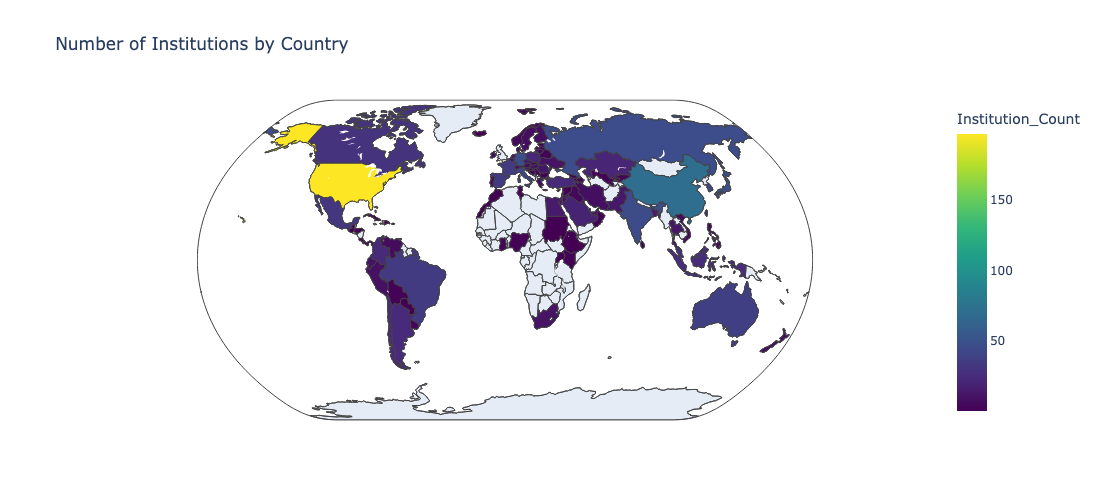

In [122]:
# Step 1: Count institutions per 2-letter code
country_counts = df1['Location'].value_counts().reset_index()
country_counts.columns = ['Country_Code', 'Institution_Count']

# Step 2: Convert ISO-2 to ISO-3
def to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None  # skip invalid codes

country_counts['ISO3'] = country_counts['Country_Code'].apply(to_iso3)
country_counts = country_counts.dropna(subset=['ISO3'])  # Drop unknowns

# Step 3: Choropleth
fig = px.choropleth(
    country_counts,
    locations='ISO3',
    color='Institution_Count',
    color_continuous_scale='viridis',
    locationmode='ISO-3',
    title='Number of Institutions by Country'#
)

# Resize the map window
fig.update_layout(
    width=1000,   # Increase width
    height=500    # Increase height
)

fig.update_geos(
    projection_type='natural earth',
    showcoastlines=True,
    showcountries=True
)
fig.show()

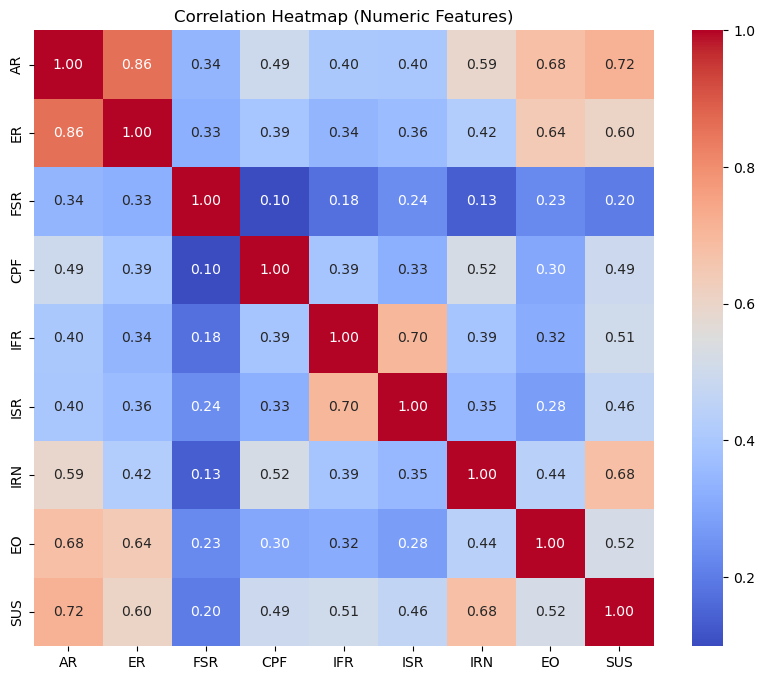

In [124]:
# Select only numeric columns from df1
numeric_df = df1.select_dtypes(include=['number'])

# Compute the correlation matrix for the numeric columns
corr_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap with annotations (formatted to 2 decimal places)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Add title and display the plot
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [83]:
import numpy as np
import pandas as pd

# Get upper triangle of the correlation matrix (excluding self-correlations)
corr_pairs = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Flatten into long format
all_corr = corr_pairs.stack().reset_index()
all_corr.columns = ['v1', 'v2', 'corr']

# Round correlation values
all_corr['corr'] = all_corr['corr'].round(4)

# Sort by absolute correlation strength (descending)
all_corr_sorted = all_corr.reindex(all_corr['corr'].abs().sort_values(ascending=False).index)

# Display top results
print(all_corr_sorted)

     v1   v2    corr
0    AR   ER  0.8574
7    AR  SUS  0.7173
26  IFR  ISR  0.7029
6    AR   EO  0.6785
34  IRN  SUS  0.6766
13   ER   EO  0.6437
14   ER  SUS  0.6041
5    AR  IRN  0.5889
23  CPF  IRN  0.5237
35   EO  SUS  0.5209
29  IFR  SUS  0.5066
2    AR  CPF  0.4938
25  CPF  SUS  0.4908
32  ISR  SUS  0.4629
33  IRN   EO  0.4395
12   ER  IRN  0.4199
3    AR  IFR  0.4035
4    AR  ISR  0.3951
9    ER  CPF  0.3919
21  CPF  IFR  0.3908
27  IFR  IRN  0.3897
11   ER  ISR  0.3617
30  ISR  IRN  0.3490
1    AR  FSR  0.3415
10   ER  IFR  0.3403
22  CPF  ISR  0.3275
8    ER  FSR  0.3262
28  IFR   EO  0.3155
24  CPF   EO  0.3026
31  ISR   EO  0.2775
17  FSR  ISR  0.2361
19  FSR   EO  0.2303
20  FSR  SUS  0.2000
16  FSR  IFR  0.1760
18  FSR  IRN  0.1350
15  FSR  CPF  0.0987


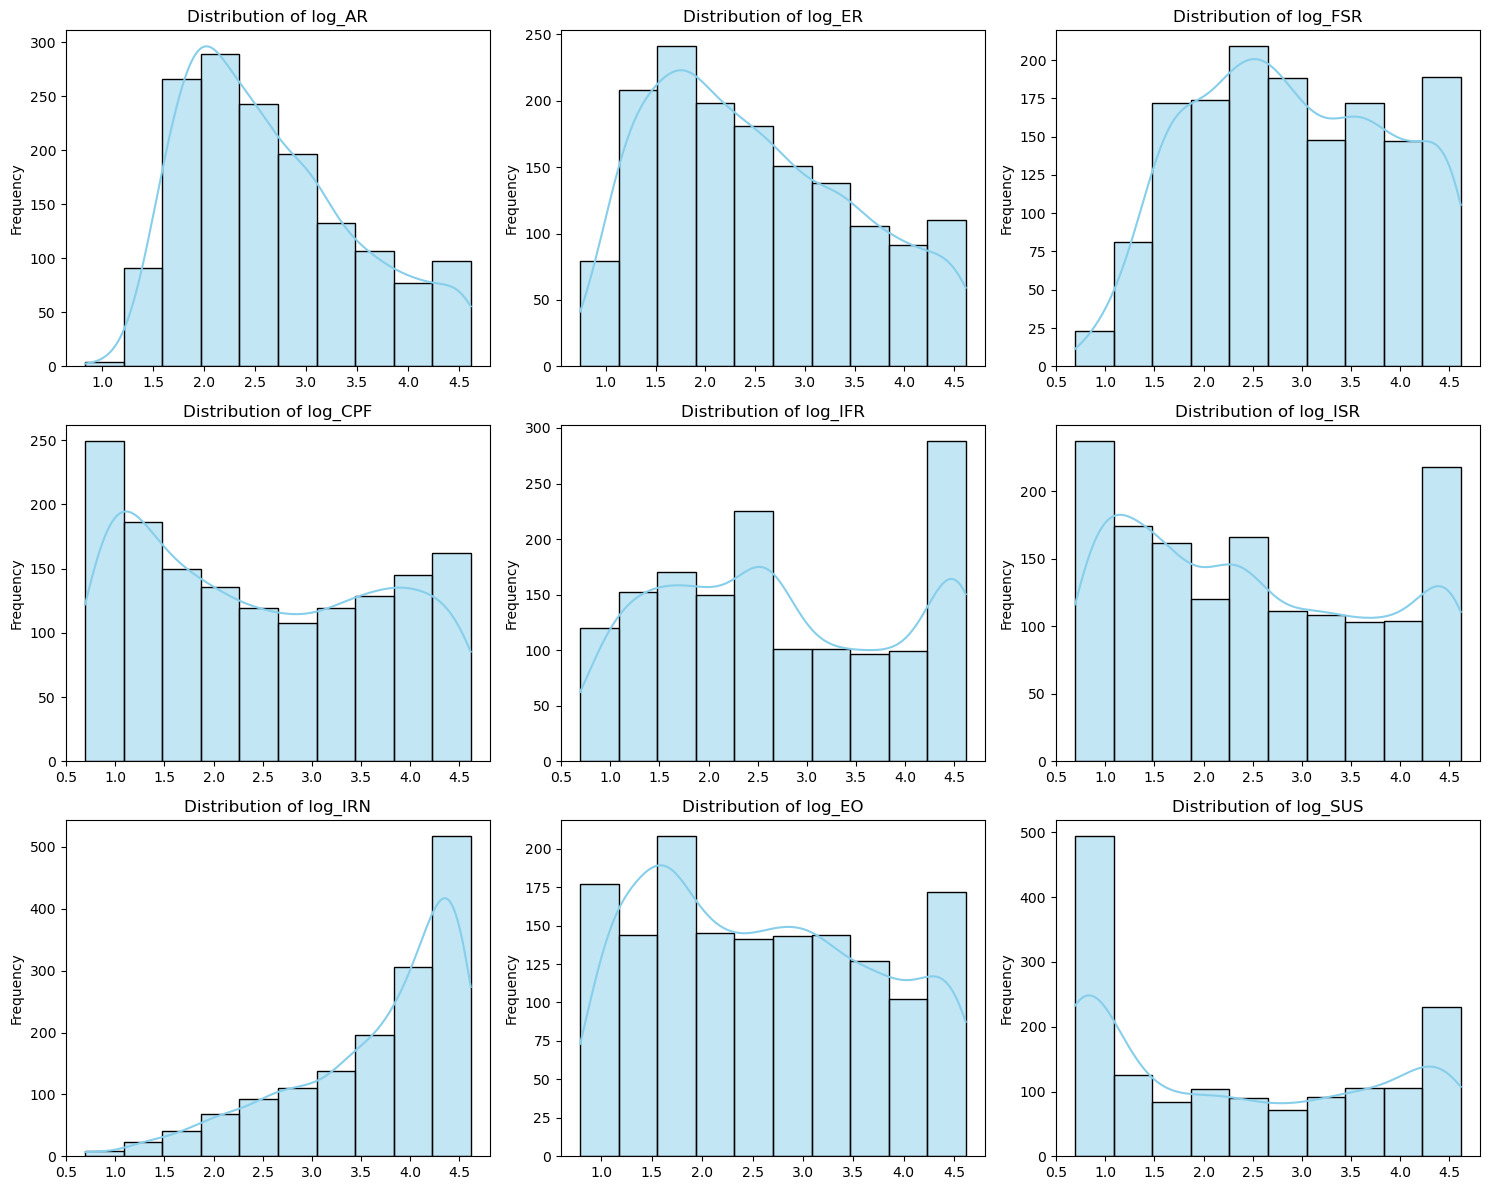

In [136]:
# List of features to log-transform
features_to_log = ['AR', 'ER', 'FSR', 'CPF', 'IFR', 'ISR', 'IRN', 'EO', 'SUS']

# Log-transform and add to df1 as new columns
for col in features_to_log:
    df1[f'log_{col}'] = np.log1p(df1[col])

# Plot log-transformed variables from df1
columns_to_plot = [f'log_{col}' for col in features_to_log]

# Create the subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

# Loop through each variable and plot
for i, col in enumerate(columns_to_plot):
    sns.histplot(df1[col], bins=10, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

# Clean up any unused subplots
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [150]:
# Step 1: Count country frequencies
country_counts = df1['Location'].value_counts(normalize=True).cumsum()

print(country_counts)

# Step 2: Choose countries that cover 90% of the data
top_countries = country_counts[country_counts <= 0.8].index.tolist()

len(top_countries)

Location
US     0.131071
UK     0.190951
CN     0.238190
JP     0.270792
DE     0.302728
         ...   
NCY    0.997339
IS     0.998004
CY     0.998669
LU     0.999335
HN     1.000000
Name: proportion, Length: 106, dtype: float64
['US', 'UK', 'CN', 'JP', 'DE', 'RU', 'IN', 'KR', 'IT', 'AU', 'BR', 'ES', 'FR', 'MX', 'CA', 'MY', 'TW', 'ID', 'CL', 'AR', 'TR', 'CO', 'PL', 'KZ', 'SA', 'CZ', 'BD', 'EG', 'PK', 'NL', 'RO', 'TH', 'AE']


33

In [152]:
developed_countries = [
    'AU',  # Australia
    'AT',  # Austria
    'BE',  # Belgium
    'CA',  # Canada
    'CY',  # Cyprus
    'CZ',  # Czechia
    'DK',  # Denmark
    'EE',  # Estonia
    'FI',  # Finland
    'FR',  # France
    'DE',  # Germany
    'GR',  # Greece
    'HU',  # Hungary
    'IS',  # Iceland
    'IE',  # Ireland
    'IL',  # Israel
    'IT',  # Italy
    'JP',  # Japan
    'KR',  # South Korea
    'LV',  # Latvia
    'LT',  # Lithuania
    'LU',  # Luxembourg
    'MT',  # Malta
    'NL',  # Netherlands
    'NZ',  # New Zealand
    'NO',  # Norway
    'PL',  # Poland
    'PT',  # Portugal
    'SG',  # Singapore
    'SK',  # Slovakia
    'SI',  # Slovenia
    'ES',  # Spain
    'SE',  # Sweden
    'CH',  # Switzerland
    'GB',  # United Kingdom
    'US',  # United States
]

In [ ]:
# Model 1 



In [ ]:
# Model 2

In [ ]:
# Model 3